In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# 1. 데이터 로드 및 전처리
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)


In [9]:
# 2. DNN 모델 정의
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [11]:
# 3. 학습 + 기록 (history)
history = model.fit(
    x_train, y_train_cat,
    epochs=5,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8351 - loss: 0.5677 - val_accuracy: 0.9563 - val_loss: 0.1486
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9630 - loss: 0.1246 - val_accuracy: 0.9652 - val_loss: 0.1172
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9770 - loss: 0.0783 - val_accuracy: 0.9704 - val_loss: 0.0932
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9844 - loss: 0.0515 - val_accuracy: 0.9749 - val_loss: 0.0883
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9889 - loss: 0.0385 - val_accuracy: 0.9754 - val_loss: 0.0821


In [13]:
# 4. 평가
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f'\n테스트 정확도: {test_acc:.4f}, 테스트 손실: {test_loss:.4f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9740 - loss: 0.0858

테스트 정확도: 0.9778, 테스트 손실: 0.0724


In [15]:
# 5. 손글씨 이미지 예측
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_6192\1387997442.py:15: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_6192\1387997442.py:15: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_6192\1387997442.py:15: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_6192\1387997442.py:15: UserWarning: Glyph 45813 (\N{HANGUL SYLLABLE DAB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


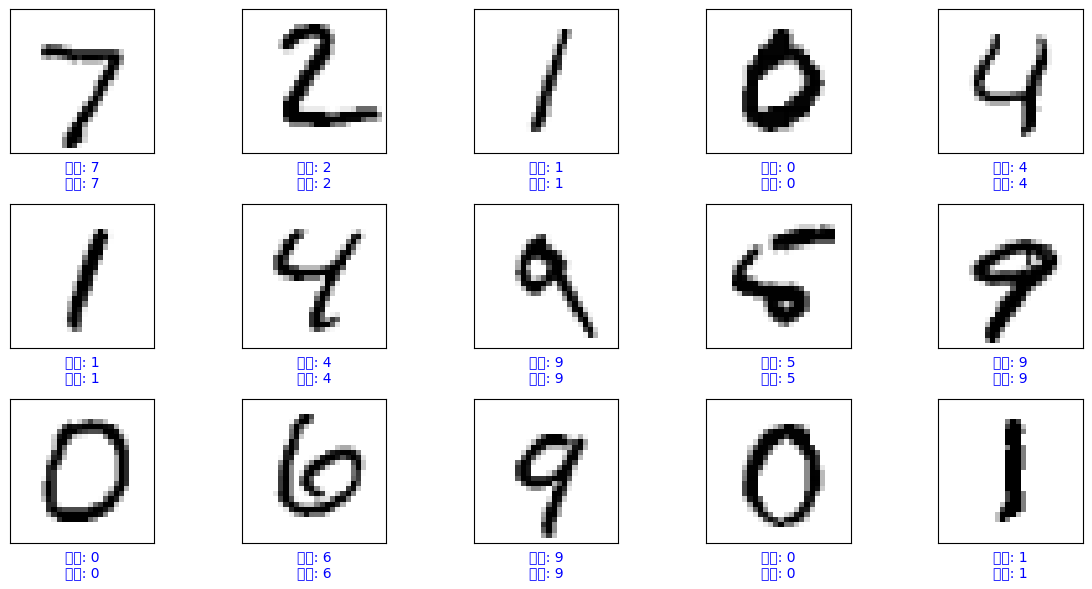

In [17]:
# 6. 손글씨 이미지 시각화
plt.figure(figsize=(12, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)

    true_label = y_test[i]
    pred_label = predicted_labels[i]

    color = 'blue' if true_label == pred_label else 'red'
    plt.xlabel(f'예측: {pred_label}\n정답: {true_label}', color=color)
plt.tight_layout()
plt.show()

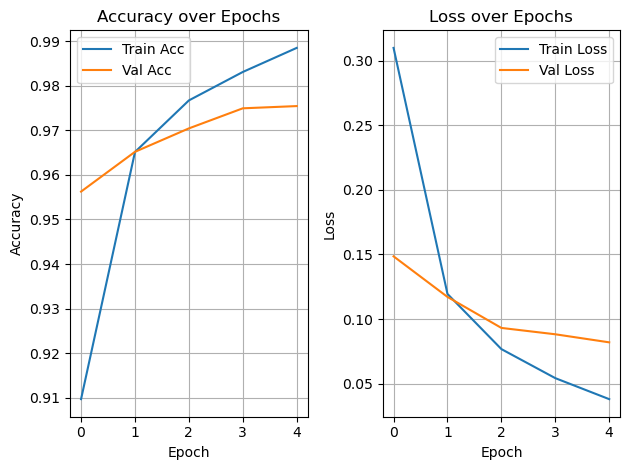

In [21]:
# 정확도 시각화
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# 손실 시각화
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()